In [1]:
import sqlite3
from pathlib import Path

__file__ = %pwd
DATA = Path(__file__).parent.parent / "data"
PRIORITIES = DATA / "Priorities"
DATABASE = DATA / "databases" / "exploration.db"
con = sqlite3.connect(DATABASE)
cur = con.cursor()

In [2]:
import pandas as pd
import numpy as np


def get_data():
    return pd.read_sql_query("SELECT * FROM ACGRWide", con)

df = get_data()

### Data Summary

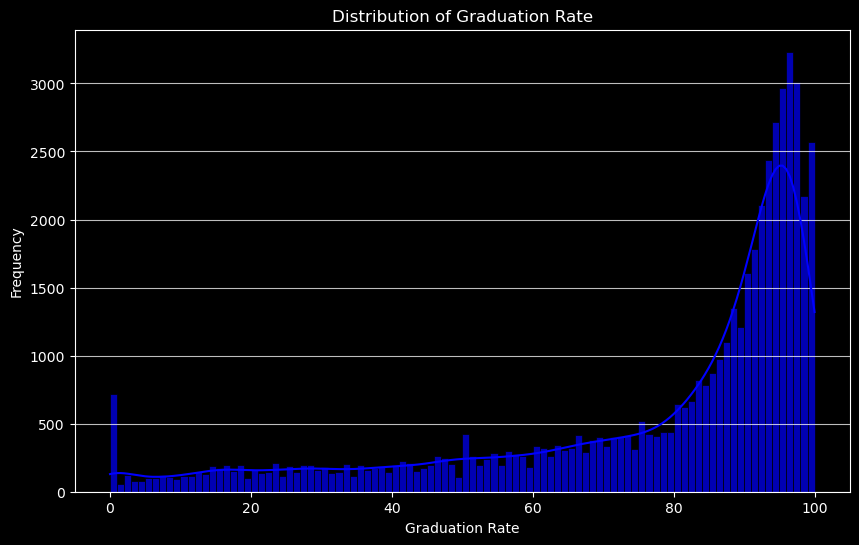

Mean Graduation Rate: 76.84798497595003


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(
    df["RegHSDiplomaRate.TA"].dropna(),
    bins=100,
    kde=True,
    color="blue",
    alpha=0.7,
    edgecolor="black",
)
plt.xlabel("Graduation Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Graduation Rate")
plt.grid(axis="y", alpha=0.75)
plt.show()


mean_graduation_rate = df["RegHSDiplomaRate.TA"].mean()
print(f"Mean Graduation Rate: {mean_graduation_rate}")

# Lasso Models

## Graduation Rate as Target Variable

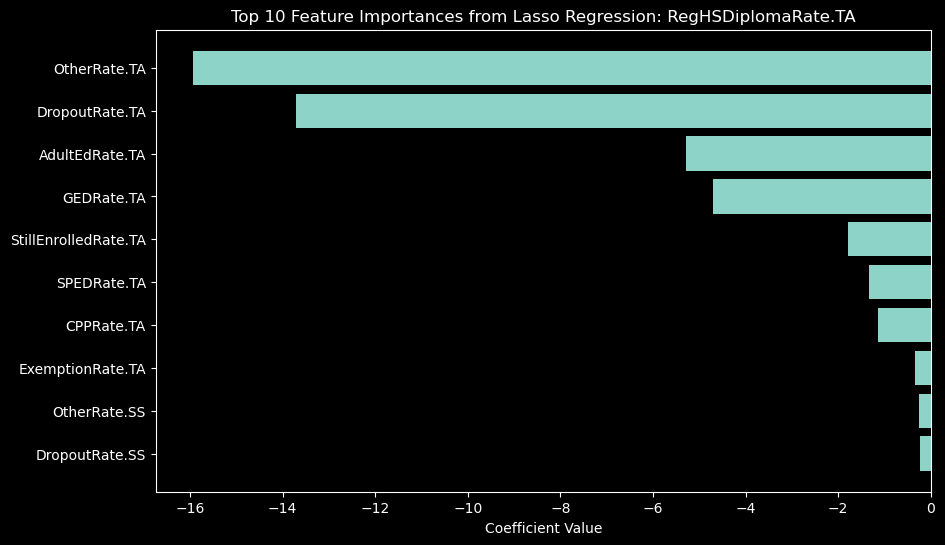

In [6]:
import sys
from pathlib import Path

# Add the path to the 'modeling' module
sys.path.append(str(DATA.parent / "modeling"))

import utils.lasso as lasso_utils
import utils.xgboost as xgb_utils

target_column = "RegHSDiplomaRate.TA"
columns_to_drop = [col for col in df.columns if col.startswith("RegHSDiploma")]

X_numeric, y, sorted_pairs = lasso_utils.fit_lasso_model(
    df, target_column, columns_to_drop
)
lasso_utils.plot_lasso_coefficients(target_column, sorted_pairs)

### Graduation Rate Model Validation (DID NOT CONVERGE)

In [7]:
lasso_model = lasso_utils.LassoCV(cv=5, random_state=42, max_iter=10000)
lasso_results = lasso_utils.train_and_evaluate_lasso_model(X_numeric, y, lasso_model)
print(f"R^2 Score: {lasso_results['r2']}")
print(f"Mean Squared Error: {lasso_results['mse']}")
print(f"Root Mean Squared Error: {lasso_results['rmse']}")

R^2 Score: -3.4848899210571105e-05
Mean Squared Error: 668.5404035391682
Root Mean Squared Error: 25.85614827346038


### Graduation Rate Residuals

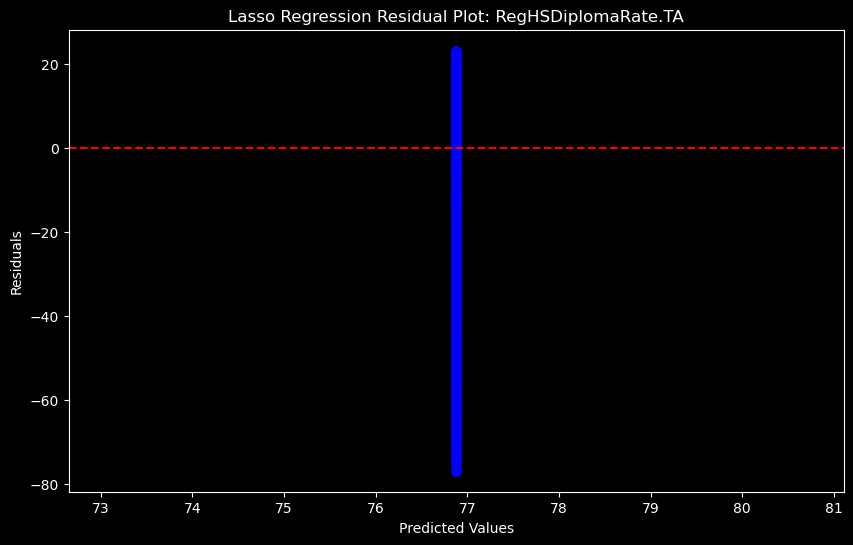

In [8]:
lasso_utils.plot_lasso_residuals(
    lasso_results["y_test"], lasso_results["y_pred"], target_column
)

### Graduation Rate Actual vs. Predicted

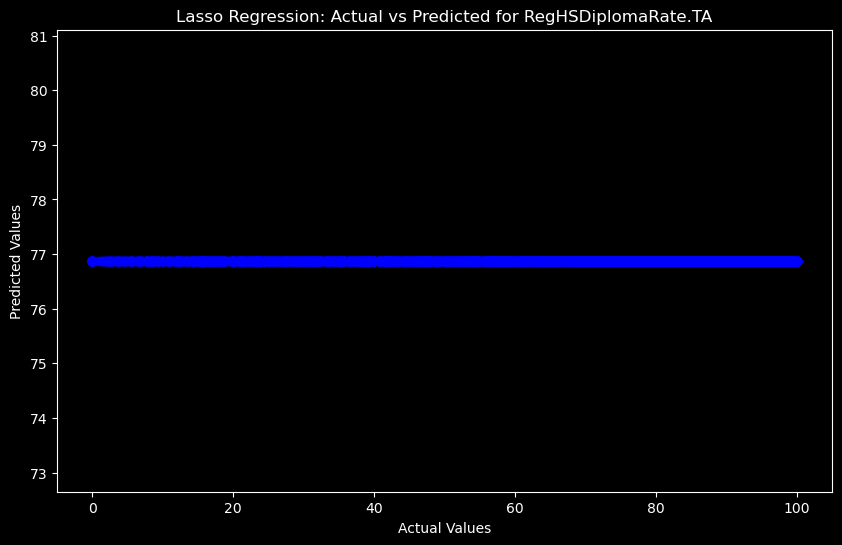

In [9]:
lasso_utils.plot_actual_predicted_lasso(
    lasso_results["y_test"], lasso_results["y_pred"], target_column
)

## CSU/UC Readiness as Target Variable


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5750.755423422903, tolerance: 4215.237746550274
  model = cd_fast.enet_coordinate_descent_gram(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5162.143374308944, tolerance: 4234.841421899582
  model = cd_fast.enet_coordinate_descent_gram(


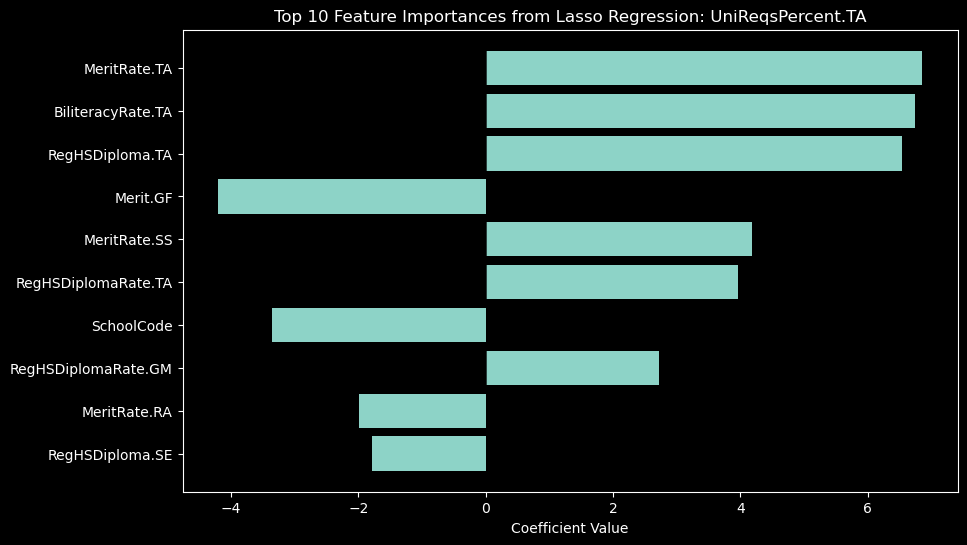

In [10]:
target_column = "UniReqsPercent.TA"
columns_to_drop = [col for col in df.columns if col.startswith("UniReqs")]

X_numeric, y, sorted_pairs = lasso_utils.fit_lasso_model(
    df, target_column, columns_to_drop
)
lasso_utils.plot_lasso_coefficients(target_column, sorted_pairs)

### CSU/UC Readiness Model Validation

In [11]:
lasso_model = lasso_utils.LassoCV(cv=5, random_state=42, max_iter=10000)
lasso_results = lasso_utils.train_and_evaluate_lasso_model(X_numeric, y, lasso_model)
print(f"R^2 Score: {lasso_results['r2']}")
print(f"Mean Squared Error: {lasso_results['mse']}")
print(f"Root Mean Squared Error: {lasso_results['rmse']}")

R^2 Score: 0.0056703249406986345
Mean Squared Error: 1013.0638050254483
Root Mean Squared Error: 31.828663261680475


### CSU/UC Readiness Residuals


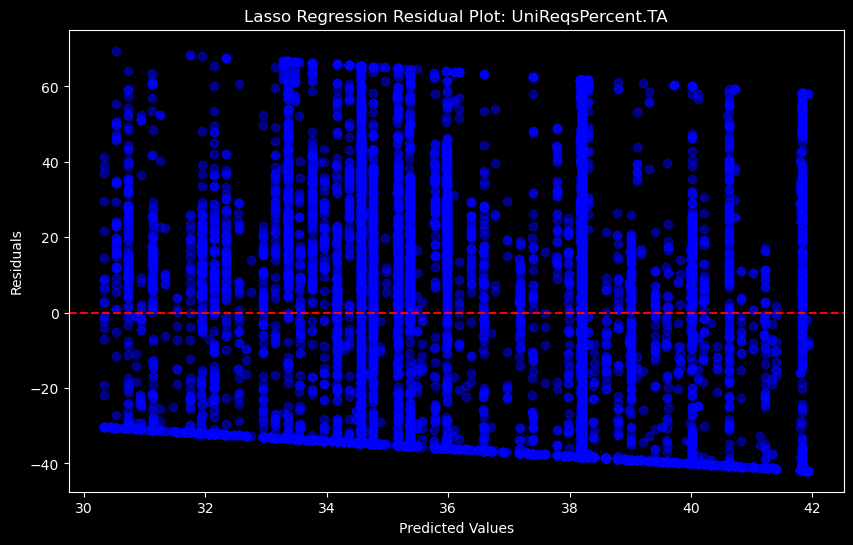

In [12]:
lasso_utils.plot_lasso_residuals(
    lasso_results["y_test"], lasso_results["y_pred"], target_column
)

### CSU/UC Readiness Actual vs. Predicted

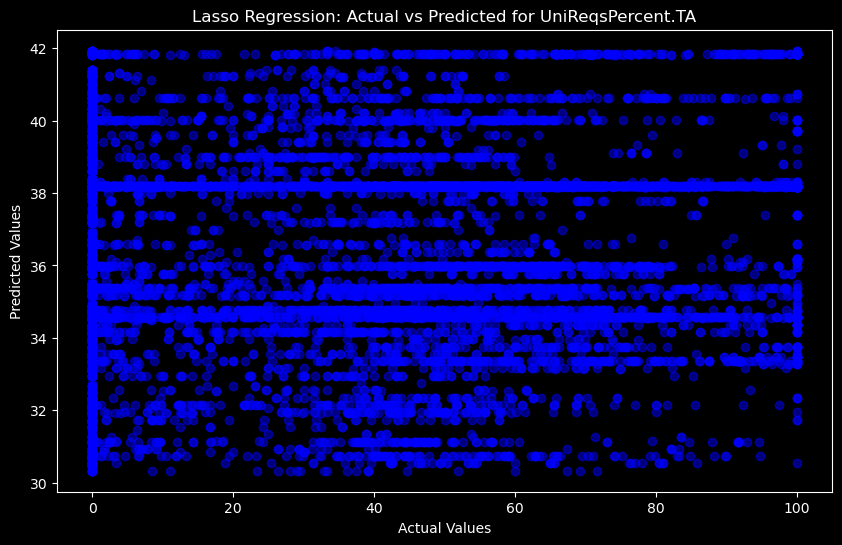

In [13]:
lasso_utils.plot_actual_predicted_lasso(
    lasso_results["y_test"], lasso_results["y_pred"], target_column
)

# XGBoost Models

## CSU/UC Readiness as Target

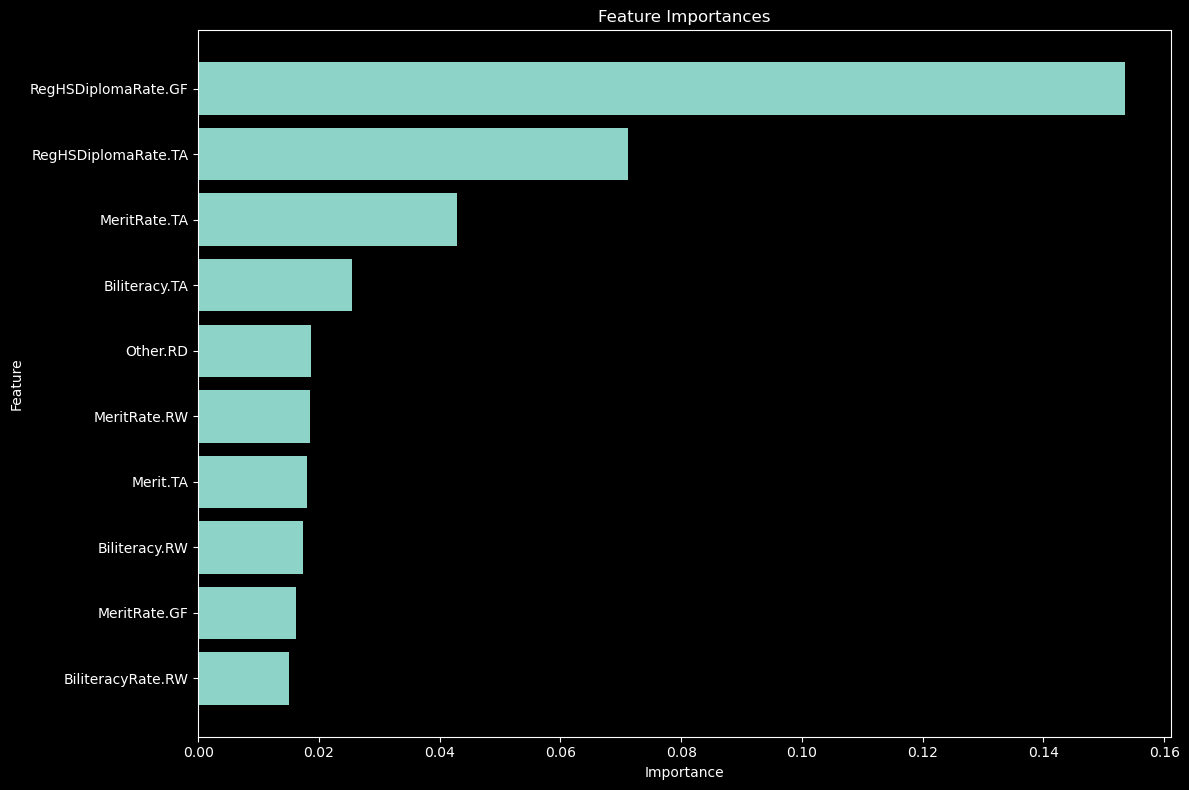

In [14]:
df_xgb = get_data()
target_column = "UniReqsPercent.TA"
columns_to_drop = [col for col in df_xgb.columns if col.startswith("UniReqs")]

xgb_results = xgb_utils.train_xgboost_model(df_xgb, target_column, columns_to_drop)

### Model Validation

In [15]:
print(xgb_results["metrics"])

{'MSE': 161.4554710586274, 'RMSE': 12.706512938592846, 'MAE': 8.177150070356335, 'R^2': 0.8415302518184048}


### Residuals

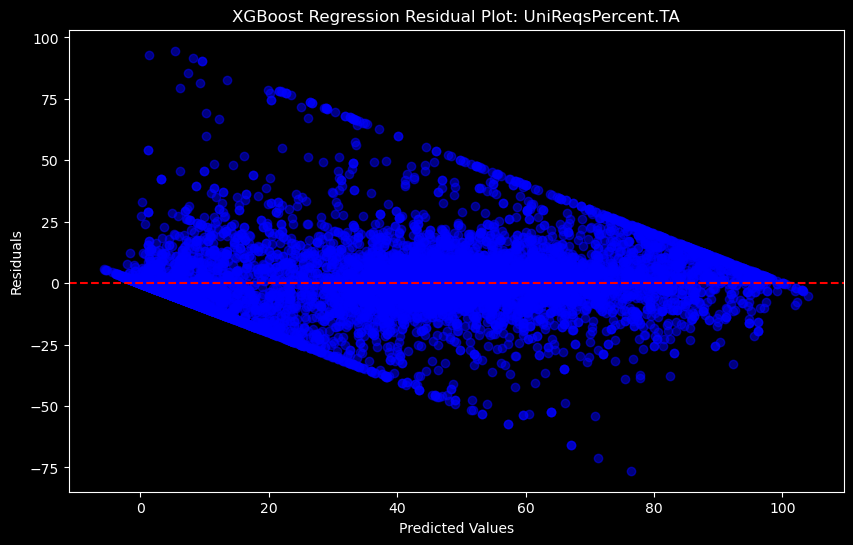

In [16]:
xgb_utils.plot_xgb_residuals(
    xgb_results["y_test"], xgb_results["y_pred"], target_column
)

### Actual vs. Predicted

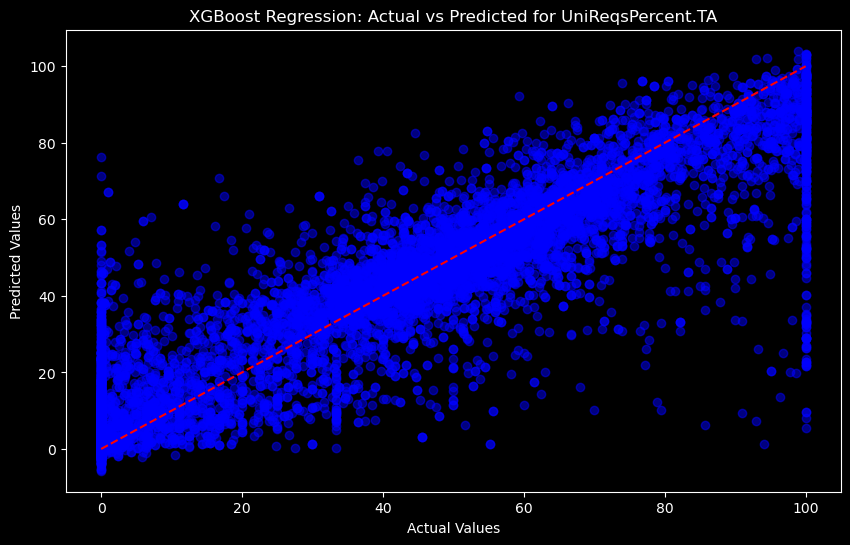

In [17]:
xgb_utils.plot_xgb_predicted_actual(
    xgb_results["y_test"], xgb_results["y_pred"], target_column
)

## Graduation Rate as Target

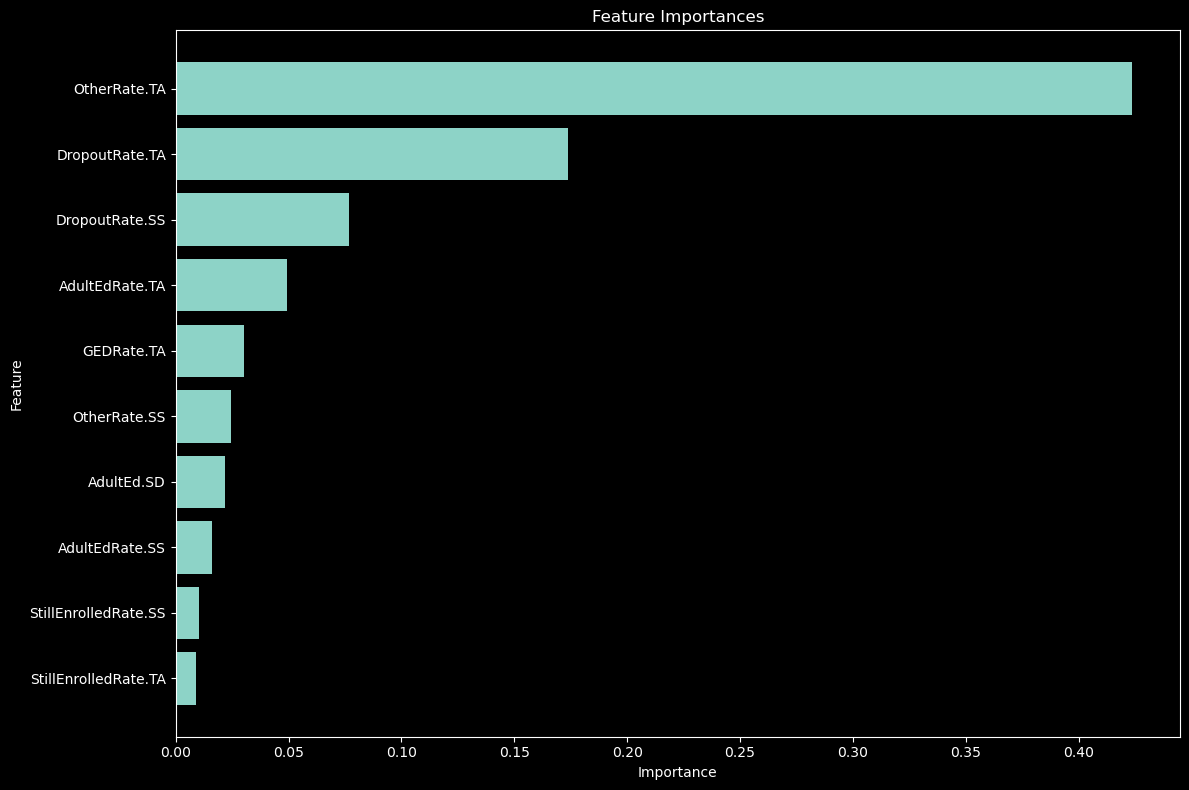

In [18]:
target_column = "RegHSDiplomaRate.TA"
columns_to_drop = [col for col in df_xgb.columns if col.startswith("RegHSDiploma")]

xgb_results = xgb_utils.train_xgboost_model(df_xgb, target_column, columns_to_drop)

### Model Validation

In [19]:
print(xgb_results["metrics"])

{'MSE': 1.9510836547506398, 'RMSE': 1.3968119611281398, 'MAE': 0.6294972716051938, 'R^2': 0.9970814753490752}


### Residuals

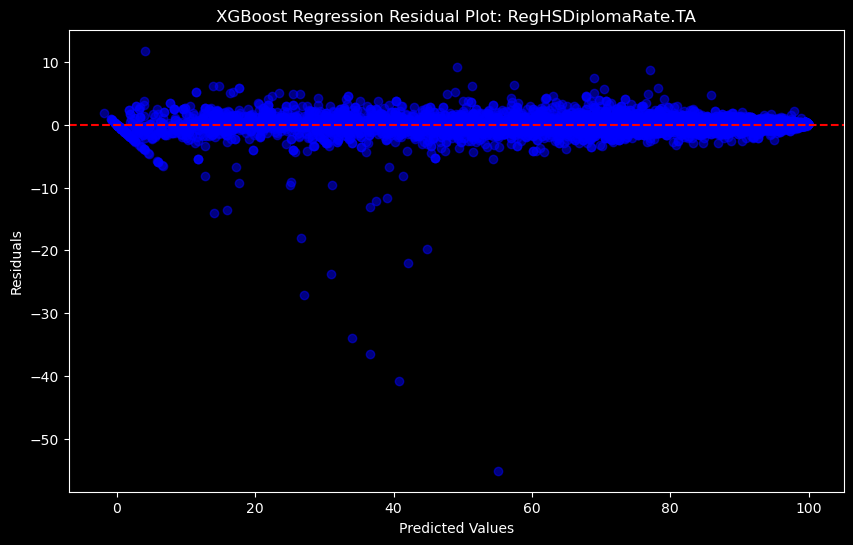

In [20]:
xgb_utils.plot_xgb_residuals(
    xgb_results["y_test"], xgb_results["y_pred"], target_column
)

### Actual vs. Predicted

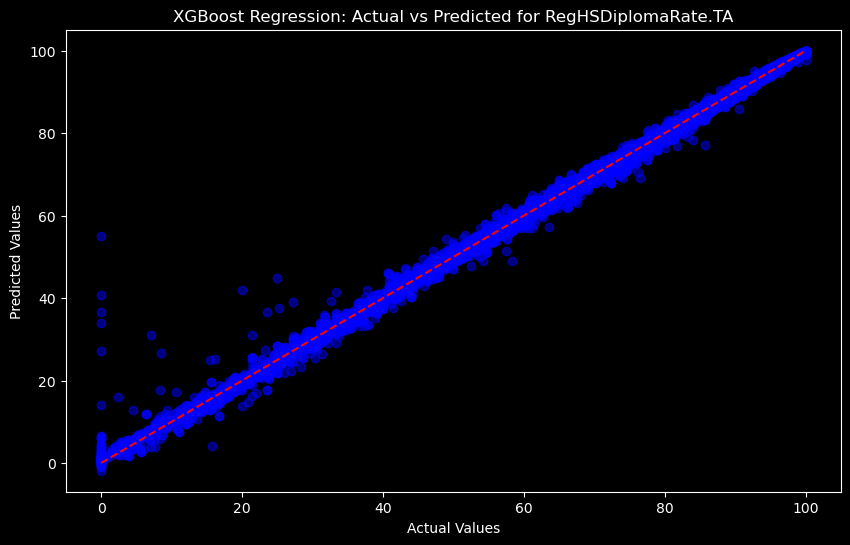

In [21]:
xgb_utils.plot_xgb_predicted_actual(
    xgb_results["y_test"], xgb_results["y_pred"], target_column
)

In [22]:
con.close()